In [2]:
!pip install geopandas
# !pip install geoplot

In [3]:
import pandas as pd
import geopandas as gpd
# import geoplot
# import geoplot.crs as gcrs
import json
# import matplotlib.pyplot as plt

In [4]:
df_countries = gpd.read_file('ne_50m_admin_0_countries.geojson')
df_regions = gpd.read_file('ne_50m_admin_0_map_units.geojson')

In [5]:
type(df_countries['geometry'][0])


shapely.geometry.polygon.Polygon

<AxesSubplot:>

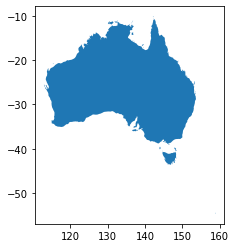

In [6]:
a = df_countries[df_countries["NAME"] == "Australia"]
a.plot()

<AxesSubplot:>

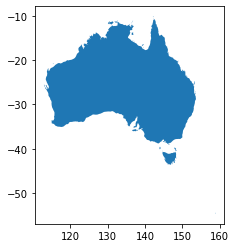

In [7]:
a = df_regions[df_regions["NAME"] == "Australia"]

a.plot()

In [8]:
a

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
246,Admin-0 map unit,1,2,Australia,AU1,1,2,Country,1,Australia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((143.17891 -11.95449, 143.15293..."


In [9]:
df_countries[['SU_A3','SOV_A3', 'ADM0_A3', 'NAME', 'NAME_EN', 'ADMIN', 'SOVEREIGNT', 'ISO_A3', 
     'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH'
     ]]

,SU_A3,SOV_A3,ADM0_A3,NAME,NAME_EN,ADMIN,SOVEREIGNT,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH
0,ZWE,ZWE,ZWE,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,ZWE,ZWE,716,716
1,ZMB,ZMB,ZMB,Zambia,Zambia,Zambia,Zambia,ZMB,ZMB,894,894
2,YEM,YEM,YEM,Yemen,Yemen,Yemen,Yemen,YEM,YEM,887,887
3,VNM,VNM,VNM,Vietnam,Vietnam,Vietnam,Vietnam,VNM,VNM,704,704
4,VEN,VEN,VEN,Venezuela,Venezuela,Venezuela,Venezuela,VEN,VEN,862,862
...,...,...,...,...,...,...,...,...,...,...,...
237,AFG,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,AFG,AFG,004,004
238,KAS,KAS,KAS,Siachen Glacier,Siachen Glacier,Siachen Glacier,Kashmir,-99,-99,-99,-99
239,ATA,ATA,ATA,Antarctica,Antarctica,Antarctica,Antarctica,ATA,ATA,010,010
240,SXM,NL1,SXM,Sint Maarten,Sint Maarten,Sint Maarten,Netherlands,SXM,SXM,534,534


In [10]:
pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', 9999)

df_regions[df_regions["SOV_A3"].duplicated(keep=False)].reset_index()[
    ['SU_A3','SOV_A3', 'ADM0_A3', 'NAME', 'NAME_EN', 'ADMIN', 'SOVEREIGNT', 'ISO_A3', 
     'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH'
     ]]

,SU_A3,SOV_A3,ADM0_A3,NAME,NAME_EN,ADMIN,SOVEREIGNT,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH
0,MNP,US1,MNP,N. Mariana Is.,Northern Mariana Islands,Northern Mariana Islands,United States of America,MNP,MNP,580,580
1,VIR,US1,VIR,U.S. Virgin Is.,United States Virgin Islands,United States Virgin Islands,United States of America,VIR,VIR,850,850
2,GUM,US1,GUM,Guam,Guam,Guam,United States of America,GUM,GUM,316,316
3,ASM,US1,ASM,American Samoa,American Samoa,American Samoa,United States of America,ASM,ASM,016,016
4,PRI,US1,PRI,Puerto Rico,Puerto Rico,Puerto Rico,United States of America,PRI,PRI,630,630
5,USA,US1,USA,United States of America,United States of America,United States of America,United States of America,USA,USA,840,840
6,SGS,GB1,SGS,S. Geo. and the Is.,South Georgia and the South Sandwich Islands,South Georgia and the Islands,United Kingdom,SGS,SGS,239,239
7,IOT,GB1,IOT,Br. Indian Ocean Ter.,British Indian Ocean Territory,British Indian Ocean Territory,United Kingdom,IOT,IOT,086,086
8,SHN,GB1,SHN,Saint Helena,Saint Helena,Saint Helena,United Kingdom,SHN,SHN,654,654
9,PCN,GB1,PCN,Pitcairn Is.,Pitcairn Islands,Pitcairn Islands,United Kingdom,PCN,PCN,612,612


In [11]:
regions_lookup = dict(zip(df_regions.ISO_A3_EH, df_regions.NAME_EN))
countries_lookup = dict(zip(df_countries.ISO_A3, df_countries.NAME_EN))

In [12]:
# SPLITTING UP COUNTRIES!

# Find isos from regions not in countries
sr = set(df_regions['ISO_A3_EH'])
sc = set(df_countries['ISO_A3_EH'])

([(i, regions_lookup[i]) for i in sr.difference(sc)],
  [(i, countries_lookup[i]) for i in sc.difference(sr)])

([('MTQ', 'Martinique'),
  ('CCK', 'Cocos'),
  ('MYT', 'Mayotte'),
  ('GLP', 'Guadeloupe'),
  ('SJM', 'Svalbard'),
  ('REU', 'Réunion'),
  ('TKL', 'Tokelau'),
  ('GUF', 'French Guiana'),
  ('BES', 'Caribbean Netherlands'),
  ('CXR', 'Christmas Island')],
 [])

In [13]:
# Grab these extra regions to add...
region_ids = sr.difference(sc)

regions_to_add = df_regions[df_regions["ISO_A3_EH"].isin(region_ids)]
regions_to_add[['SU_A3','SOV_A3', 'ADM0_A3', 'NAME', 'NAME_EN', 'ADMIN', 'SOVEREIGNT', 'ISO_A3', 
     'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH'
     ]]

,SU_A3,SOV_A3,ADM0_A3,NAME,NAME_EN,ADMIN,SOVEREIGNT,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH
98,NSV,NOR,NOR,Svalbard Is.,Svalbard,Norway,Norway,SJM,SJM,744,744
105,TKL,NZ1,NZL,Tokelau,Tokelau,New Zealand,New Zealand,TKL,TKL,772,772
109,NLY,NL1,NLD,Caribbean Netherlands,Caribbean Netherlands,Netherlands,Netherlands,BES,BES,535,535
174,MYT,FR1,FRA,Mayotte,Mayotte,France,France,MYT,MYT,175,175
175,REU,FR1,FRA,Réunion,Réunion,France,France,REU,REU,638,638
176,MTQ,FR1,FRA,Martinique,Martinique,France,France,MTQ,MTQ,474,474
177,GLP,FR1,FRA,Guadeloupe,Guadeloupe,France,France,GLP,GLP,312,312
178,GUF,FR1,FRA,French Guiana,French Guiana,France,France,GUF,GUF,254,254
247,CXR,AU1,IOA,Christmas I.,Christmas Island,Indian Ocean Territories,Australia,CXR,CXR,162,162
248,CCK,AU1,IOA,Cocos Is.,Cocos,Indian Ocean Territories,Australia,CCK,CCK,166,166


In [15]:
# We want to combine regions with the country df, but these regions are already contained within
# the admin region country from the country df.
ids_to_replace = list(set(regions_to_add.ADM0_A3))
ids_to_replace

['NLD', 'FRA', 'NOR', 'NZL', 'IOA']

In [16]:
to_remove = df_countries[df_countries.SU_A3.isin(ids_to_replace)]
to_remove[['SU_A3','SOV_A3', 'ADM0_A3', 'NAME', 'NAME_EN', 'ADMIN', 'SOVEREIGNT', 'ISO_A3', 
     'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH'
     ]]

,SU_A3,SOV_A3,ADM0_A3,NAME,NAME_EN,ADMIN,SOVEREIGNT,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH
88,NOR,NOR,NOR,Norway,Norway,Norway,Norway,-99,NOR,-99,578
93,NZL,NZ1,NZL,New Zealand,New Zealand,New Zealand,New Zealand,NZL,NZL,554,554
96,NLD,NL1,NLD,Netherlands,Netherlands,Netherlands,Netherlands,NLD,NLD,528,528
160,FRA,FR1,FRA,France,France,France,France,-99,FRA,-99,250
226,IOA,AU1,IOA,Indian Ocean Ter.,Australian Indian Ocean Territories,Indian Ocean Territories,Australia,-99,AUS,-99,036


In [18]:
to_add_names = set(to_remove.NAME_EN)
to_add = df_regions[df_regions.NAME_EN.isin(to_add_names)]

to_add = pd.concat([to_add, regions_to_add])

to_add[['SU_A3','SOV_A3', 'ADM0_A3', 'NAME', 'NAME_EN', 'ADMIN', 'SOVEREIGNT', 'ISO_A3', 
     'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH'
     ]]

,SU_A3,SOV_A3,ADM0_A3,NAME,NAME_EN,ADMIN,SOVEREIGNT,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH
96,NOR,NOR,NOR,Norway,Norway,Norway,Norway,-99,NOR,-99,578
103,NZL,NZ1,NZL,New Zealand,New Zealand,New Zealand,New Zealand,NZL,NZL,554,554
107,NLD,NL1,NLD,Netherlands,Netherlands,Netherlands,Netherlands,NLD,NLD,528,528
173,FXX,FR1,FRA,France,France,France,France,FRA,FRA,249,249
98,NSV,NOR,NOR,Svalbard Is.,Svalbard,Norway,Norway,SJM,SJM,744,744
105,TKL,NZ1,NZL,Tokelau,Tokelau,New Zealand,New Zealand,TKL,TKL,772,772
109,NLY,NL1,NLD,Caribbean Netherlands,Caribbean Netherlands,Netherlands,Netherlands,BES,BES,535,535
174,MYT,FR1,FRA,Mayotte,Mayotte,France,France,MYT,MYT,175,175
175,REU,FR1,FRA,Réunion,Réunion,France,France,REU,REU,638,638
176,MTQ,FR1,FRA,Martinique,Martinique,France,France,MTQ,MTQ,474,474


In [ ]:
# c_id = "NLD"
# to_remove[to_remove.ISO_A3_EH == c_id].plot()
# to_add[to_add.ISO_A3_EH == c_id].plot()
a

In [19]:
# Remove old countries
final_list = df_countries[~df_countries.NAME_EN.isin(to_add_names)].reset_index()
print(len(to_remove), len(df_countries), len(final_list))

# Add new ones!
final_list = pd.concat([final_list, to_add])
print(len(to_add), len(final_list))


final_list[['SU_A3','SOV_A3', 'ADM0_A3', 'NAME', 'NAME_EN', 'ADMIN', 'SOVEREIGNT', 'ISO_A3', 
     'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH'
     ]]

5 242 237
14 251


,SU_A3,SOV_A3,ADM0_A3,NAME,NAME_EN,ADMIN,SOVEREIGNT,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH
0,ZWE,ZWE,ZWE,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,ZWE,ZWE,716,716
1,ZMB,ZMB,ZMB,Zambia,Zambia,Zambia,Zambia,ZMB,ZMB,894,894
2,YEM,YEM,YEM,Yemen,Yemen,Yemen,Yemen,YEM,YEM,887,887
3,VNM,VNM,VNM,Vietnam,Vietnam,Vietnam,Vietnam,VNM,VNM,704,704
4,VEN,VEN,VEN,Venezuela,Venezuela,Venezuela,Venezuela,VEN,VEN,862,862
5,VAT,VAT,VAT,Vatican,Vatican City,Vatican,Vatican,VAT,VAT,336,336
6,VUT,VUT,VUT,Vanuatu,Vanuatu,Vanuatu,Vanuatu,VUT,VUT,548,548
7,UZB,UZB,UZB,Uzbekistan,Uzbekistan,Uzbekistan,Uzbekistan,UZB,UZB,860,860
8,URY,URY,URY,Uruguay,Uruguay,Uruguay,Uruguay,URY,URY,858,858
9,FSM,FSM,FSM,Micronesia,Federated States of Micronesia,Federated States of Micronesia,Federated States of Micronesia,FSM,FSM,583,583


<AxesSubplot:>

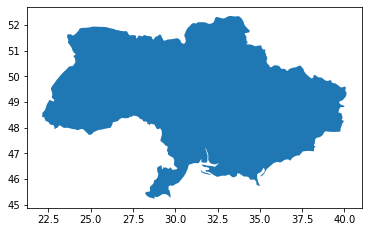

In [20]:
# FIX CRIMEA!!! FUCK

a = final_list[final_list["NAME"] == "Ukraine"]
a.plot()

In [39]:
geom = final_list[final_list["NAME"] == "Ukraine"].geometry.iloc[0]
geom_russia = final_list[final_list["NAME"] == "Russia"].geometry.iloc[0]

In [43]:
list(geom_russia.geoms)

[<POLYGON ((145.882 43.46, 145.896 43.455, 145.914 43.455, 145.931 43.457, 14...>,
 <POLYGON ((146.359 43.625, 146.332 43.62, 146.288 43.625, 146.274 43.63, 146...>,
 <POLYGON ((146.046 43.409, 146.032 43.407, 146.028 43.42, 146.049 43.434, 14...>,
 <POLYGON ((137.179 55.1, 137.055 54.927, 136.969 54.924, 136.903 54.961, 136...>,
 <POLYGON ((150.59 59.019, 150.511 59.007, 150.472 59.035, 150.47 59.054, 150...>,
 <POLYGON ((120.261 73.09, 120.008 73.045, 119.792 73.045, 119.64 73.124, 119...>,
 <POLYGON ((124.543 73.85, 124.482 73.848, 124.366 73.875, 124.336 73.91, 124...>,
 <POLYGON ((106.27 78.206, 106.151 78.199, 106.024 78.22, 106.058 78.265, 106...>,
 <POLYGON ((107.415 77.243, 107.302 77.242, 107.27 77.289, 107.366 77.347, 10...>,
 <POLYGON ((97.588 76.599, 97.535 76.584, 97.43 76.591, 97.342 76.629, 97.31 ...>,
 <POLYGON ((96.854 76.199, 96.798 76.188, 96.754 76.196, 96.739 76.207, 96.74...>,
 <POLYGON ((100.136 79.614, 99.915 79.602, 99.942 79.671, 99.956 79.69, 100.0...>,
 <PO

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

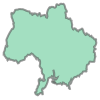

In [55]:
from shapely import MultiPolygon

p = MultiPolygon(list(geom.geoms) + list(geom_russia.geoms))
shapely.affinity.scale(p, 4, 10)

In [57]:
touches = []
for p in geom_russia.geoms:
    for q in geom.geoms:
        if (p.touches(q)):
            print("!")
            touches.append(p)

!
!


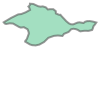

In [65]:
crimea = touches[1]
crimea

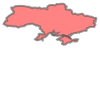

In [66]:
new_ukraine_geom = list(geom.geoms)
new_ukraine_geom.append(crimea)
new_ukraine_geom = MultiPolygon(new_ukraine_geom)

new_ukraine_geom

In [68]:
new_russia_geom = list(geom_russia.geoms)
print(len(new_russia_geom))
new_russia_geom.remove(crimea)
print(len(new_russia_geom))
new_russia_geom = MultiPolygon(new_russia_geom)

101
100


In [74]:
final_list.loc[final_list["NAME"] == "Ukraine", 'geometry'] = new_ukraine_geom
final_list.loc[final_list["NAME"] == "Russia", 'geometry'] = new_russia_geom

<AxesSubplot:>

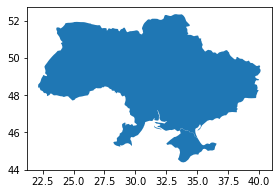

In [77]:
c = final_list[final_list["NAME"] == "Ukraine"]
c.plot()

<AxesSubplot:>

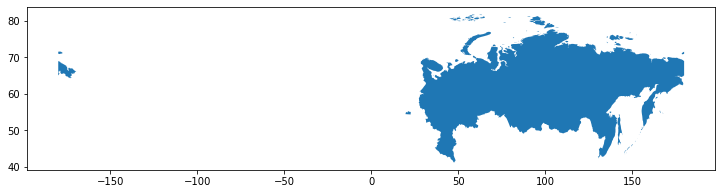

In [78]:
final_list[final_list["NAME"] == "Russia"].plot()

In [79]:
# Finally, before saving, grab useful columns...

output = final_list[["SU_A3", "NAME_EN", "geometry"]]
output.to_file("countries.geojson", driver='GeoJSON')


# TODO: Grab lower res version of high res countries...